In [ ]:
# SUpervised (labeled)
# Linear Regression ( y = mx + c)
# Multiple LInear Regession ( y = (m1x1)*(m2x2)*(m3x3) + c)

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/linear-regression-dataset.csv')
df.head()

,experience,salary
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   experience  14 non-null     float64
 1   salary      14 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 352.0 bytes


In [ ]:
df.describe()

,experience,salary
count,14.000000,14.000000
mean,6.250000,8778.571429
std,4.979767,5733.495185
min,0.000000,2250.000000
25%,2.250000,4125.000000
50%,5.500000,7750.000000
75%,9.500000,12000.000000
max,15.000000,20000.000000


In [ ]:
df.isnull().sum()

experience    0
salary        0
dtype: int64

In [ ]:
df.corr()

,experience,salary
experience,1.0000,0.9887
salary,0.9887,1.0000


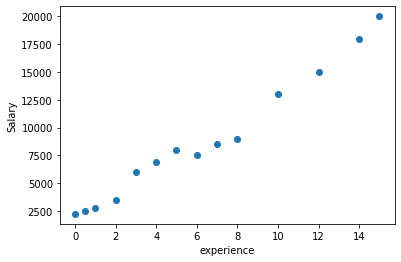

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df.experience, df.salary)
plt.xlabel('experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
df.head()

,experience,salary
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000


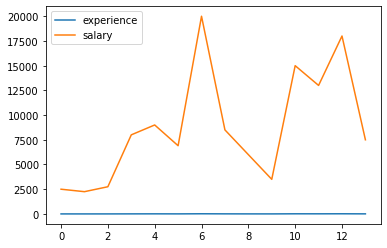

In [ ]:
a = df.loc[:, ['experience', 'salary']]
a.plot()

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
x = df.experience.values.reshape(-1,1)
y = df.salary.values.reshape(-1,1)

In [ ]:
lr.fit(x,y)

LinearRegression()

In [ ]:
x

array([[ 0.5],
       [ 0. ],
       [ 1. ],
       [ 5. ],
       [ 8. ],
       [ 4. ],
       [15. ],
       [ 7. ],
       [ 3. ],
       [ 2. ],
       [12. ],
       [10. ],
       [14. ],
       [ 6. ]])

In [ ]:
lr.predict([[25.8]])

array([[31033.27867944]])

In [ ]:
df1 = pd.read_csv('/content/advertising (1).csv')
df1.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df1.shape

(200, 4)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df1.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df1.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


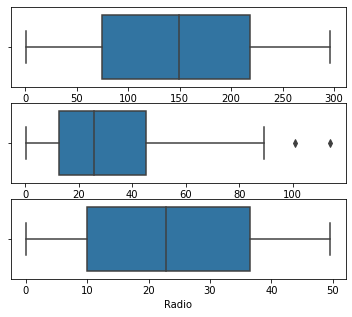

In [ ]:
import seaborn as sns
fig, axs = plt.subplots(3, figsize = (6,5))
sns.boxplot(df1['TV'], ax = axs[0])
sns.boxplot(df1['Newspaper'],  ax = axs[1])
sns.boxplot(df1['Radio'],  ax = axs[2])

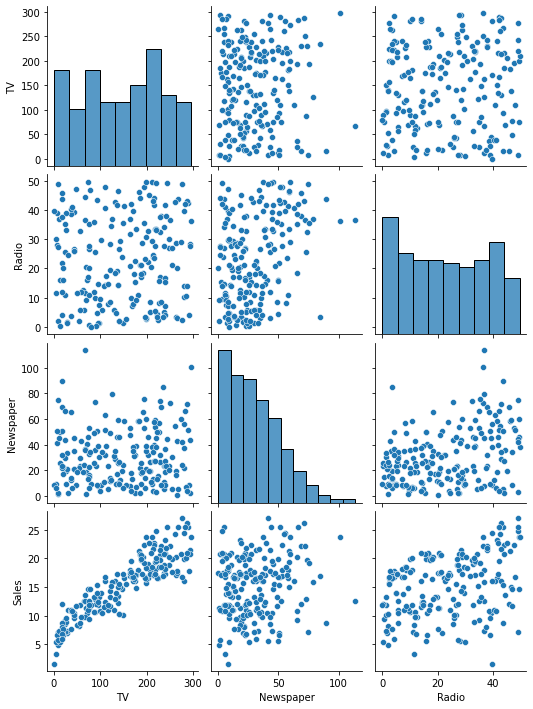

In [ ]:
sns.pairplot(df1, x_vars = ['TV', 'Newspaper', 'Radio'])

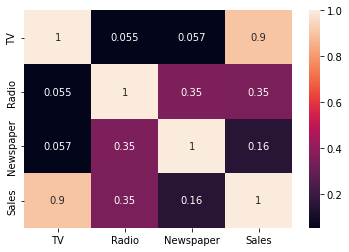

In [ ]:
sns.heatmap(df1.corr(), annot = True)
plt.show()

In [ ]:
X = df1['TV']
y = df1['Sales']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.3, random_state = 0)


In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
lr.params

const    7.143822
TV       0.054732
dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
x = df.experience.values.reshape(-1,1)
y = df.salary.values.reshape(-1,1)

In [ ]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     573.1
Date:                Mon, 18 Jul 2022   Prob (F-statistic):           5.56e-51
Time:                        15:20:04   Log-Likelihood:                -312.40
No. Observations:                 140   AIC:                             628.8
Df Residuals:                     138   BIC:                             634.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1438      0.400     17.838      0.0

In [ ]:
df1.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


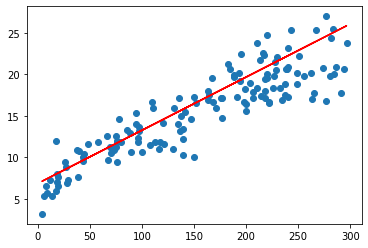

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.879 + 0.064*X_train, 'r')
plt.show()

In [ ]:
df2 = pd.read_csv('/content/insurance (1).csv')
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


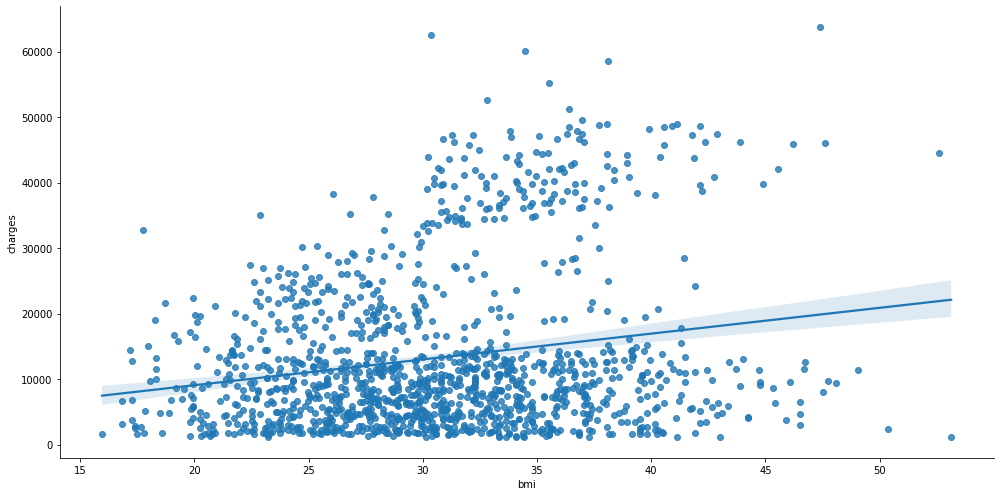

In [ ]:
sns.lmplot(x = 'bmi', y = 'charges', data = df2, aspect = 2, height = 7)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df2.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


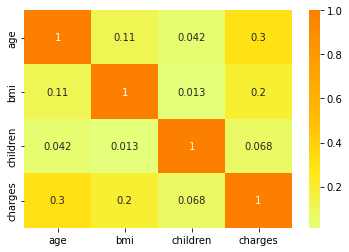

In [ ]:
corr = df2.corr()
sns.heatmap(corr, annot = True, cmap = 'Wistia')

In [ ]:
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
cat_col = ['sex', 'children', 'smoker', 'region']
df_encode = pd.get_dummies(data = df2)

In [ ]:
df_encode

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1
